# Import Libararies

In [9]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
from prettytable import PrettyTable
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from PIL import Image

import tensorflow as tf 


# Check GPU detected

In [2]:
print(tf.__version__) # Check Enviroment Variable CUDA_VISIBLE_DEVICES
print(tf.config.list_physical_devices()) # Check in the terminal using nvidia-smi to monitor usage

2.5.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Convert the dataset into numpy arrays, or retrieve pickled objects

In [25]:
train=r"C:\correct"
category=["healthypng","covidpng"]
data=[]
Model="SPEC"
for i in category:
    path=os.path.join(train,i)
    label=category.index(i)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img_arr=cv2.imread(img_path,0)
        data.append([img_arr,label])
random.shuffle(data)
x=[]
y=[]
x_test=[]
y_test=[]
for features,labels in data:
    x.append(features)
    y.append(labels)
    
x_test=np.array(x[int(len(x)*0.85):-1])
y_test=np.array(y[int(len(y)*0.85):-1])

x=np.array(x[0:int(0.85*len(x))])
y=np.array(y[0:int(0.85*len(y))])
img = Image.fromarray(x[0], 'L')
img.save('my.png')
img.show()
x=x/255
x_test=x_test/255

data.clear()

x=x.reshape(len(x),300,400,1)
x_test=x_test.reshape(len(x_test),300,400,1)

# Increase Page file size if Memory_Error occurs

In [26]:
pickle.dump(x,open('x_spec2.pkl','wb'))
pickle.dump(y,open('y_spec2.pkl','wb'))
pickle.dump(x_test,open('x_spec_test2.pkl','wb'))
pickle.dump(y_test,open('y_spec_test2.pkl','wb'))

In [3]:
x=pickle.load(open('x_spec2.pkl','rb'))
x_test=pickle.load(open('x_spec_test2.pkl','rb'))
y=pickle.load(open('y_spec2.pkl','rb'))
y_test=pickle.load(open('y_spec_test2.pkl','rb'))

# Build the CNet

In [27]:
def Train():
    # To prevent Resources_Exausted_Error
    gpu_options=tf.compat.v1.GPUOptions(allow_growth=True)
    config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
    config.gpu_options.per_process_gpu_memory_fraction = 0.99
    session = tf.compat.v1.InteractiveSession(config=config)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=x.shape[1::]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#first hidden layer 
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#second hidden layer
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#output layer
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(x,y,epochs=10,validation_split=0.1)
    #model=tf.keras.models.Sequential()

    #model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=x.shape[1:],activation="relu",padding="same"))
    #model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    #model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
    #model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    #model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
    #model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    

    #model.add(tf.keras.layers.Flatten())
    #model.add(tf.keras.layers.BatchNormalization())

    
    #model.add(tf.keras.layers.Dense(64,activation="relu"))
    #model.add(tf.keras.layers.Dropout(0.5))


    #model.add(tf.keras.layers.Dense(2,activation="softmax"))


    #model.compile(optimizer='rmsprop',loss="sparse_categorical_crossentropy",metrics=['acc']) # or binary_crossentropy

    #es=EarlyStopping(monitor='val_loss')
    #opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, decay=1e-3,clipnorm=1)
    #model.compile(optimizer=opt, loss='mse',metrics=['acc'])
    #model.fit(x,y, epochs=10,shuffle=True,verbose=True,validation_split=0.1,batch_size=4)
    #model.fit(x,y,epochs=10,validation_split=0.1)
    try:
        session.close()
    except:
        print('meh')

    return model

In [5]:
#model=Train()

loss,win=model.evaluate(x_test,y_test)
print('============================================================================================\n')
print('loss: {}, acc: {}'.format(loss,win))
model.summary()


5/5 [==============================] - 0s 50ms/step - loss: 0.3833 - accuracy: 0.8205

loss: 0.38329780101776123, acc: 0.8205128312110901
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 398, 32)      320       
_________________________________________________________________
activation_15 (Activation)   (None, 298, 398, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 199, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 197, 32)      9248      
_________________________________________________________________
activation_16 (Activation)   (None, 147, 197, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 98, 32) 

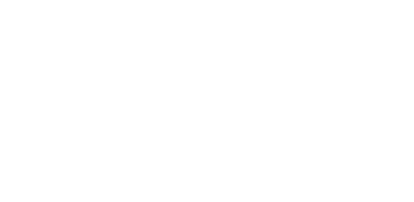

In [1]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False,color='white')
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 40
        self.horizontal_distance_between_neurons = 10
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment),linewidth=0.05,color='white')
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 10,color='white')
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 10,color='white')
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 10,color='white')

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 ,color='white')
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

network = DrawNN( [32,1,32,1,64,1,1,64,2] )
network.draw()

In [3]:
predict=model.predict([x_test])
singlepredict=np.argmax(predict,1)
fpr, tpr, _ = roc_curve(y_test, singlepredict)
auc_rf = auc(fpr, tpr)
print(auc_rf)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    print(roc_t)
    return list(roc_t['threshold']) 
print(Find_Optimal_Cutoff(y_test,singlepredict))

NameError: name 'model' is not defined

# Saving the model after achieving 95% accuracy

In [30]:
model.save("SPEC_V3")

INFO:tensorflow:Assets written to: SPEC_V3\assets


In [2]:
model=tf.keras.models.load_model("SPEC_V3")

# Strandradized Table for the model acuuaracy and after 30 runs.

In [ ]:
for i in range(30):
    model=Train()
    test=model.evaluate(x_test,y_test)
    with open(r'avg.txt','a+') as file:
        file.write("{},{}\n".format(test[1],test[0]))

# Confusion Matrix 

True


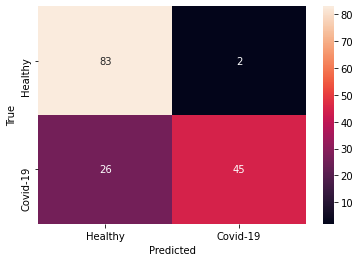

In [5]:
singlepredict=[]
singletest=[]
predict=model.predict([x_test]) # not the best way to get a some neat labels
tf.config.run_functions_eagerly(True)
print(tf.executing_eagerly())# If false then confusion.numpy will produce error

singlepredict=np.argmax(predict,1) # I forget what it does exactly or how it does it
singletest=np.array(y_test)
confusion=tf.math.confusion_matrix(labels=singletest, predictions=singlepredict).numpy()
#plt.imshow(confusion) # Green Confusion Matrix
sns.heatmap(confusion , annot=True , xticklabels=['Healthy' , 'Covid-19'] , yticklabels=['Healthy' , 'Covid-19'],fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Metrics

In [6]:
precision, recall, f1, _ = score(singletest, singlepredict)
print('Precision: {},Averge: {}'.format(precision,sum(precision)/len(precision)))
print('Recall: {},Average: {}'.format(recall,sum(recall)/len(recall)))
print('F-score: {},Average: {}'.format(f1,sum(f1)/len(f1)))


Precision: [0.76146789 0.95744681],Averge: 0.8594573492094476
Recall: [0.97647059 0.63380282],Average: 0.8051367025683513
F-score: [0.8556701  0.76271186],Average: 0.8091909837497816


In [9]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
val_loss = model.history.history['val_loss']
loss = model.history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, [i*100 for i in acc], 'green', label='Training acc')
plt.plot(epochs,[i*100 for i in val_acc], 'blue', label='Validation acc')

plt.plot(epochs, [i*100 for i in loss], 'red', label='Training loss')
plt.plot(epochs,[i*100 for i in val_loss], 'black', label='Validation loss')
plt.title('Training, validation accuaracy and loss over epochs')#'Training and validation loss'
plt.legend()

plt.show()

KeyError: 'acc'

# Some visulization into some cases in the dataset, the prediction and the true output.

In [ ]:
predict=model.predict([x_test])

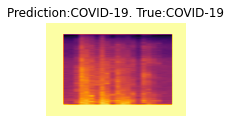

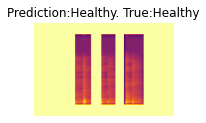

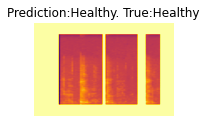

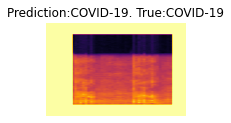

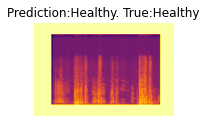

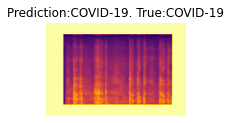

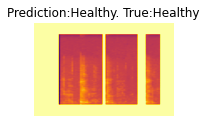

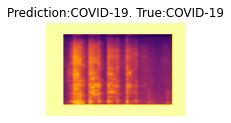

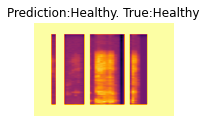

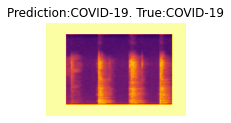

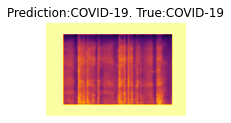

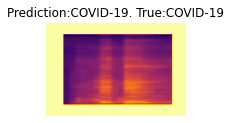

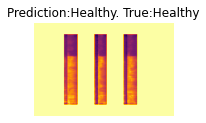

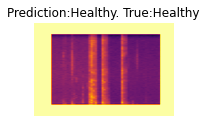

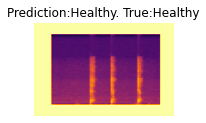

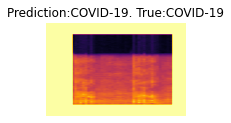

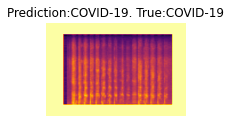

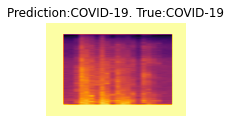

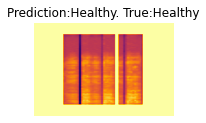

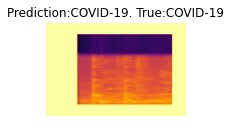

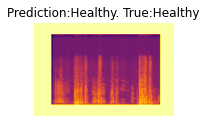

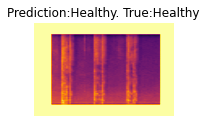

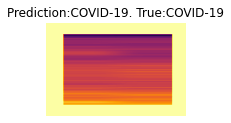

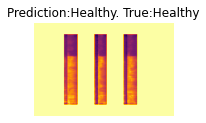

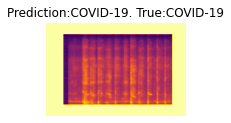

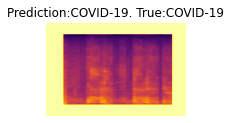

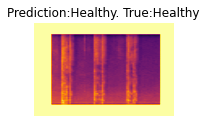

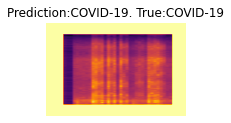

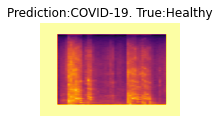

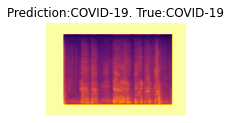

In [28]:
def simpleargmax(n):
    if list(n).index(max(n))==0:
        return "Healthy"
    elif list(n).index(max(n))==1:
        return "COVID-19"
def label(m):
    if m==0:
        return "Healthy"
    elif m==1:
        return "COVID-19"
for i in range(30):
    plt.figure(figsize = (2.5,2.5))
    val=random.randint(0,len(x_test)-1)
    plt.axis("off")
    plt.imshow(x_test[val], cmap='inferno')
    plt.title("Prediction:{}. True:{}".format(simpleargmax(predict[val]),label(y_test[val])))
    plt.show()